#Prepare Notebook

In [1]:
pip -q install transformers datasets #wandb

     |████████████████████████████████| 3.4 MB 19.4 MB/s 
     |████████████████████████████████| 306 kB 45.2 MB/s 
     |████████████████████████████████| 3.3 MB 34.8 MB/s 
     |████████████████████████████████| 61 kB 143 kB/s 
     |████████████████████████████████| 596 kB 50.5 MB/s 
     |████████████████████████████████| 895 kB 49.1 MB/s 
     |████████████████████████████████| 1.1 MB 51.3 MB/s 
     |████████████████████████████████| 243 kB 30.4 MB/s 
     |████████████████████████████████| 132 kB 52.9 MB/s 
     |████████████████████████████████| 192 kB 57.9 MB/s 
     |████████████████████████████████| 271 kB 46.8 MB/s 
     |████████████████████████████████| 160 kB 19.0 MB/s 


In [2]:
# !nvidia-smi

#PCL dataset

In [2]:
import pandas as pd
import numpy as np

In [6]:
!wget https://gist.githubusercontent.com/Sirwe-Saeedi/d51e83b72d1970b1d38a6eb8a9f61a6d/raw/4dda7ccc8e3e6b5da43cd0e826c2633795f68423/Training_set__8375_.csv
!wget https://gist.githubusercontent.com/Sirwe-Saeedi/3c344d95604fc6dc9e6ff582957c0733/raw/1a252b05e66aff51e8781e0bd36f2ca29b8ac3fb/Test_set__2094_.csv

--2022-01-04 05:57:41--  https://gist.githubusercontent.com/Sirwe-Saeedi/d51e83b72d1970b1d38a6eb8a9f61a6d/raw/4dda7ccc8e3e6b5da43cd0e826c2633795f68423/Training_set__8375_.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2336466 (2.2M) [text/plain]
Saving to: ‘Training_set__8375_.csv’

Training_set__8375_ 100%[===================>]   2.23M  --.-KB/s    in 0.05s   

2022-01-04 05:57:41 (49.1 MB/s) - ‘Training_set__8375_.csv’ saved [2336466/2336466]

--2022-01-04 05:57:41--  https://gist.githubusercontent.com/Sirwe-Saeedi/3c344d95604fc6dc9e6ff582957c0733/raw/1a252b05e66aff51e8781e0bd36f2ca29b8ac3fb/Test_set__2094_.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to 

#Training Set

In [7]:
#Skip the disclaimer at the beginning of file
df_pcl_training = pd.read_csv('./Training_set__8375_.csv', sep='\t')

df_pcl_training

,par_id,text,label
0,4341,"the scheme saw an estimated 150,000 children f...",1
1,4136,durban 's homeless communities reconciliation ...,1
2,10352,the next immediate problem that cropped up was...,1
3,8279,far more important than the implications for t...,1
4,1164,to strengthen child-sensitive social protectio...,1
...,...,...,...
8370,8380,rescue teams search for survivors on the rubbl...,0
8371,8381,the launch of ' happy birthday ' took place la...,0
8372,8382,"the unrest has left at least 20,000 people dea...",0
8373,8383,you have to see it from my perspective . i may...,0


In [8]:
df_pcl_training = df_pcl_training.dropna()
len(df_pcl_training)

8375

#Sepatate text into sentences

In [10]:
#Example
from nltk import tokenize
import nltk
nltk.download('punkt')
p = df_pcl_training['text'][7489]
print(p)
tokenize.sent_tokenize(p)
q = df_pcl_training['par_id'][7489]
q

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
"dr mayengbam lalit singh recently honourable pm of india launched scheme called "" doubling farmers ' income "" in order to uplift the welfare being of larger portion of indians . the big questions felt by people are ( i ) how would it be possible in short period of time ? and ( ii ) is it an elusive doctrine to sweep vote bank of millions of farmers for upcoming parliamentary election in 2019 ? across all over india ( except for a few states ) so many rigidities have to be solved in order to raise the real income of farmers . these rigidities are characterised by infrastructures , structures and institutions . the present article focuses on those rigidities only for manipur which has been lagging behind many indian states . regarding infrastructure ( inputs ) , the state is found backward among those backward states of india . introspecting water infrastructure , the state h

7419

In [16]:
tokenize.sent_tokenize(p)

['"dr mayengbam lalit singh recently honourable pm of india launched scheme called "" doubling farmers \' income "" in order to uplift the welfare being of larger portion of indians .',
 'the big questions felt by people are ( i ) how would it be possible in short period of time ?',
 'and ( ii ) is it an elusive doctrine to sweep vote bank of millions of farmers for upcoming parliamentary election in 2019 ?',
 'across all over india ( except for a few states ) so many rigidities have to be solved in order to raise the real income of farmers .',
 'these rigidities are characterised by infrastructures , structures and institutions .',
 'the present article focuses on those rigidities only for manipur which has been lagging behind many indian states .',
 'regarding infrastructure ( inputs ) , the state is found backward among those backward states of india .',
 'introspecting water infrastructure , the state has been under-utilising water resources despite the abundant availability .',
 '

In [8]:
List = []
length_of_paragraph = []
for i in range(len(df_pcl_training)):
  list_of_sentences = tokenize.sent_tokenize(df_pcl_training['text'][i])
  length_of_paragraph.append(len(list_of_sentences))
  #print(list_of_sentences)
  for j in range(len(list_of_sentences)):
    List.append({'par_id': df_pcl_training['par_id'][i], 'text':list_of_sentences[j]})


df_sentences = pd.DataFrame(List)

df_id_length = pd.DataFrame()
df_id_length['par_id'] = df_pcl_training['par_id']
df_id_length['length']= length_of_paragraph
df_id_length

,par_id,length
0,4341,1
1,4136,1
2,10352,2
3,8279,2
4,1164,1
...,...,...
8370,8380,1
8371,8381,3
8372,8382,1
8373,8383,5


In [57]:
df_sentences.head(8)

,par_id,text
0,4341,"the scheme saw an estimated 150,000 children f..."
1,4136,durban 's homeless communities reconciliation ...
2,10352,the next immediate problem that cropped up was...
3,10352,the samurdhi officer dhanapala lamented explai...
4,8279,far more important than the implications for t...
5,8279,"last night 's outcome will also mean many , ma..."
6,1164,to strengthen child-sensitive social protectio...
7,7568,"today , homeless women are still searching for..."


#Test/valid set

In [9]:
#Skip the disclaimer at the beginning of file
df_pcl_valid = pd.read_csv('./Test_set__2094_.csv', sep='\t')

df_pcl_valid

,par_id,text,label
0,4046,we also know that they can benefit by receivin...,1
1,1279,pope francis washed and kissed the feet of mus...,1
2,8330,many refugees do n't want to be resettled anyw...,1
3,4063,"""budding chefs , like """" fred """" , """" winston ...",1
4,4089,"""in a 90-degree view of his constituency , one...",1
...,...,...,...
2089,10462,"the sad spectacle , which occurred on saturday...",0
2090,10463,""""""" the pakistani police came to our house and...",0
2091,10464,"""when marie o'donoghue went looking for a spec...",0
2092,10465,"""sri lankan norms and culture inhibit women fr...",0


#Expanding English language contractions

In [ ]:
# contractions_dict = { 
# "ai n't": "am not / are not / is not / has not / have not",
# "are n't": "are not / am not",
# "can 't": "cannot",
# "can 't've": "cannot have",
# "'cause": "because",
# "could 've": "could have",
# "couldn't": "could not",
# "couldn't've": "could not have",
# "did n't": "did not",
# "does n't": "does not",
# "do n't": "do not",
# "had n't": "had not",
# "had n't've": "had not have",
# "has n't": "has not",
# "have n't": "have not",
# "he 'd": "he had / he would",
# "he 'd've": "he would have",
# "he 'll": "he shall / he will",
# "he 'll've": "he shall have / he will have",
# "he 's": "he has / he is",
# "how 'd": "how did",
# "how 'd'y": "how do you",
# "how 'll": "how will",
# "how 's": "how has / how is / how does",
# "I 'd": "I had / I would",
# "I 'd've": "I would have",
# "I 'll": "I shall / I will",
# "I 'll've": "I shall have / I will have",
# "I 'm": "I am",
# "I 've": "I have",
# "is n't": "is not",
# "it 'd": "it had / it would",
# "it 'd've": "it would have",
# "it 'll": "it shall / it will",
# "it 'll've": "it shall have / it will have",
# "it 's": "it has / it is",
# "let 's": "let us",
# "ma 'am": "madam",
# "may n't": "may not",
# "might 've": "might have",
# "might n't": "might not",
# "might n't've": "might not have",
# "must 've": "must have",
# "must n't": "must not",
# "must n't've": "must not have",
# "need n't": "need not",
# "need n't've": "need not have",
# "o'clock": "of the clock",
# "ought n't": "ought not",
# "ought n't've": "ought not have",
# "shan 't": "shall not",
# "sha 'n't": "shall not",
# "shan 't've": "shall not have",
# "she 'd": "she had / she would",
# "she 'd've": "she would have",
# "she 'll": "she shall / she will",
# "she 'll've": "she shall have / she will have",
# "she 's": "she has / she is",
# "should 've": "should have",
# "should n't": "should not",
# "should n't've": "should not have",
# "so 've": "so have",
# "so 's": "so as / so is",
# "that 'd": "that would / that had",
# "that 'd've": "that would have",
# "that 's": "that has / that is",
# "there 'd": "there had / there would",
# "there 'd've": "there would have",
# "there 's": "there has / there is",
# "they 'd": "they had / they would",
# "they 'd've": "they would have",
# "they 'll": "they shall / they will",
# "they 'll've": "they shall have / they will have",
# "they 're": "they are",
# "they 've": "they have",
# "to 've": "to have",
# "was n't": "was not",
# "we 'd": "we had / we would",
# "we 'd've": "we would have",
# "we 'll": "we will",
# "we 'll've": "we will have",
# "we 're": "we are",
# "we 've": "we have",
# "were n't": "were not",
# "what 'll": "what shall / what will",
# "what 'll've": "what shall have / what will have",
# "what 're": "what are",
# "what 's": "what has / what is",
# "what 've": "what have",
# "when 's": "when has / when is",
# "when 've": "when have",
# "where 'd": "where did",
# "where 's": "where has / where is",
# "where 've": "where have",
# "who 'll": "who shall / who will",
# "who 'll've": "who shall have / who will have",
# "who 's": "who has / who is",
# "who 've": "who have",
# "why 's": "why has / why is",
# "why 've": "why have",
# "will 've": "will have",
# "wo n't": "will not",
# "wo n't've": "will not have",
# "would 've": "would have",
# "would n't": "would not",
# "would n't've": "would not have",
# "y 'all": "you all",
# "y 'all'd": "you all would",
# "y 'all'd've": "you all would have",
# "y 'all're": "you all are",
# "y 'all've": "you all have",
# "you 'd": "you had / you would",
# "you 'd've": "you would have",
# "you 'll": "you shall / you will",
# "you 'll've": "you shall have / you will have",
# "you 're": "you are",
# "you 've": "you have"
# }

In [ ]:
# import re

# def expand_contractions(text, contraction_mapping=contractions_dict):
#     # contraction_mapping is a dictionary of words having the compact form
#     contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())),flags=re.IGNORECASE|re.DOTALL)
#     def expand_match(contraction):
#         match = contraction.group(0)
#         first_char = match[0]
#         expanded_contraction = contraction_mapping.get(match) \
#                                    if contraction_mapping.get(match) \
#                                     else contraction_mapping.get(match.lower())                       
#         expanded_contraction = first_char+expanded_contraction[1:]
#         return expanded_contraction
        
#     expanded_text = contractions_pattern.sub(expand_match, text)
#     expanded_text = re.sub("'", "", expanded_text)
#     return expanded_text

# # for i in range(10468):
# #   expand_contractions(df_pcl['paragraph'][i], contractions_dict)
# df_pcl['paragraph']= df_pcl['paragraph'].apply(expand_contractions, contractions_dict)
# df_pcl['paragraph'][0]

In [ ]:
#df_pcl['paragraph'] = [df_pcl['paragraph'][i].replace('<h>', '') for i in range(10468)]
#df_pcl['paragraph'] = [df_pcl['paragraph'][i].replace('? ? ?', '') for i in range(10468)]

#Maximum length of paragraphs

In [10]:
maxi = 0
for i in range(8375):
  maxi2 = len(df_pcl_training['text'][i])
  if maxi2>maxi:
    index = i
    maxi = max(maxi, maxi2)
maxi, index, df_pcl_training['text'][index] 

(5501,
 7489,
 '"dr mayengbam lalit singh recently honourable pm of india launched scheme called "" doubling farmers \' income "" in order to uplift the welfare being of larger portion of indians . the big questions felt by people are ( i ) how would it be possible in short period of time ? and ( ii ) is it an elusive doctrine to sweep vote bank of millions of farmers for upcoming parliamentary election in 2019 ? across all over india ( except for a few states ) so many rigidities have to be solved in order to raise the real income of farmers . these rigidities are characterised by infrastructures , structures and institutions . the present article focuses on those rigidities only for manipur which has been lagging behind many indian states . regarding infrastructure ( inputs ) , the state is found backward among those backward states of india . introspecting water infrastructure , the state has been under-utilising water resources despite the abundant availability . for kharif season 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


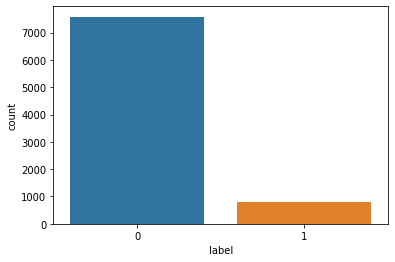

In [11]:
import seaborn as sns
sns.countplot(df_pcl_training['label'])

#PegasusTokenizer 

In [12]:
!pip install sentencepiece

     |████████████████████████████████| 1.2 MB 34.4 MB/s 


#Model in action
Transform our text into a sequence using tokenizer, then truncate long sentences, pad small ones and return a tensor structure that the model will use to generate paraphrased sentences.

In [13]:
import torch
import pandas as pd
from transformers import PegasusForConditionalGeneration, PegasusTokenizer

torch_device = 'cuda' if torch.cuda.is_available() else 'cpu'
# torch_device = 'cpu'
print(torch_device)
MODEL_NAME = 'tuner007/pegasus_paraphrase'
tokenizer = PegasusTokenizer.from_pretrained(MODEL_NAME)

cuda


Downloading:   0%|          | 0.00/1.82M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/86.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

In [14]:
tokenizer

PreTrainedTokenizer(name_or_path='tuner007/pegasus_paraphrase', vocab_size=96103, model_max_len=60, is_fast=False, padding_side='right', special_tokens={'eos_token': '</s>', 'unk_token': '<unk>', 'pad_token': '<pad>', 'mask_token': '<mask_2>', 'additional_special_tokens': ['<mask_1>', '<unk_2>', '<unk_3>', '<unk_4>', '<unk_5>', '<unk_6>', '<unk_7>', '<unk_8>', '<unk_9>', '<unk_10>', '<unk_11>', '<unk_12>', '<unk_13>', '<unk_14>', '<unk_15>', '<unk_16>', '<unk_17>', '<unk_18>', '<unk_19>', '<unk_20>', '<unk_21>', '<unk_22>', '<unk_23>', '<unk_24>', '<unk_25>', '<unk_26>', '<unk_27>', '<unk_28>', '<unk_29>', '<unk_30>', '<unk_31>', '<unk_32>', '<unk_33>', '<unk_34>', '<unk_35>', '<unk_36>', '<unk_37>', '<unk_38>', '<unk_39>', '<unk_40>', '<unk_41>', '<unk_42>', '<unk_43>', '<unk_44>', '<unk_45>', '<unk_46>', '<unk_47>', '<unk_48>', '<unk_49>', '<unk_50>', '<unk_51>', '<unk_52>', '<unk_53>', '<unk_54>', '<unk_55>', '<unk_56>', '<unk_57>', '<unk_58>', '<unk_59>', '<unk_60>', '<unk_61>', '<

In [15]:
model = PegasusForConditionalGeneration.from_pretrained(MODEL_NAME).to(torch_device)

Downloading:   0%|          | 0.00/2.12G [00:00<?, ?B/s]

## hyper-parameters
‘num_beam’, number of times the model will search for the most optimal follow-up word within a sequence

‘num_return_sequences’ the number of sentences the model will generate (we’ll pass 50)

‘temperature’ which regulates the chances of high probability words and decreases the chances of low probability words to appear in the generation.

Pegasus works with max_length = 60, 
however, the maximun length of sample
 in PCL is 5493

In [58]:
def get_response(input_text, num_return_sequences, num_beams):
    batch = tokenizer([input_text],
                                            truncation=True,
                                            padding='longest',
                                            max_length=60,  #or 5493
                                            return_tensors="pt").to(torch_device)
    translated = model.generate(**batch,
                                max_length=60,  #or 5493
                                num_beams=num_beams,
                                num_return_sequences=num_return_sequences,
                                temperature=1.8).to(torch_device)
    tgt_text = tokenizer.batch_decode(translated, skip_special_tokens=True)
    return tgt_text

In [59]:
def main(train_df):
    train = train_df[['text']]
    #new Series where each row is a list of generated text
    print(train['text'])
    train['text'] = train['text'].apply(get_response, num_return_sequences=10, num_beams=10)
    #flatten them by making every element of the list into a row by using the ‘explode’ function of Pandas.
    generated = train.explode('text')  
    # generated = generated.dropna()
    # generated = generated.drop_duplicates()
    return generated

In [169]:
df_sentences

,par_id,text
0,4341,"the scheme saw an estimated 150,000 children f..."
1,4136,durban 's homeless communities reconciliation ...
2,10352,the next immediate problem that cropped up was...
3,10352,the samurdhi officer dhanapala lamented explai...
4,8279,far more important than the implications for t...
...,...,...
16560,8383,"<h> yes , i know these handhelds are hopelessl..."
16561,8384,yet there was one occasion when we went to the...
16562,8384,the woman who took care of her two disabled ch...
16563,8384,just put them all against the wall and shot in...


In [170]:
df_id_length, len(df_id_length), len(df_id_length[:8])

(      par_id  length
 0       4341       1
 1       4136       1
 2      10352       2
 3       8279       2
 4       1164       1
 ...      ...     ...
 8370    8380       1
 8371    8381       3
 8372    8382       1
 8373    8383       5
 8374    8384       4
 
 [8375 rows x 2 columns], 8375, 8)

In [171]:
pegasus_generated = main(df_sentences)
pegasus_generated

0        the scheme saw an estimated 150,000 children f...
1        durban 's homeless communities reconciliation ...
2        the next immediate problem that cropped up was...
3        the samurdhi officer dhanapala lamented explai...
4        far more important than the implications for t...
                               ...                        
16560    <h> yes , i know these handhelds are hopelessl...
16561    yet there was one occasion when we went to the...
16562    the woman who took care of her two disabled ch...
16563    just put them all against the wall and shot in...
16564    you know , when you have to scrub the blood fr...
Name: text, Length: 16565, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,text
0,"Between 1920 and 1974 150,000 children from po..."
0,"Between 1920 and 1974 an estimated 150,000 chi..."
0,"An estimated 150,000 children from poor famili..."
0,"Between 1920 and 1974 150,000 children from po..."
0,"Between 1920 and 1974 150,000 children from po..."
...,...
16564,When you have to clean the blood from children...
16564,When you have to scrub the blood from children...
16564,When you have to clean the blood from children...
16564,When you have to clean the blood from children...


In [172]:
# df_sentences_selected = df_sentences[:14]
# df_sentences_selected

In [173]:
par_ids_10 = []
for i in range(len(df_sentences)):
  for j in range(10):
    par_id = list(df_sentences['par_id'])[i]
    par_ids_10.append(par_id)


In [174]:
pegasus_generated['par_id'] = par_ids_10
pegasus_generated = pegasus_generated.reset_index()
pegasus_generated

,index,text,par_id
0,0,"Between 1920 and 1974 150,000 children from po...",4341
1,0,"Between 1920 and 1974 an estimated 150,000 chi...",4341
2,0,"An estimated 150,000 children from poor famili...",4341
3,0,"Between 1920 and 1974 150,000 children from po...",4341
4,0,"Between 1920 and 1974 150,000 children from po...",4341
...,...,...,...
165645,16564,When you have to clean the blood from children...,8384
165646,16564,When you have to scrub the blood from children...,8384
165647,16564,When you have to clean the blood from children...,8384
165648,16564,When you have to clean the blood from children...,8384


#Concat sentences with the same par_id to get Original paragraph. Paragraphs vary in terms of number sentences.

In [175]:
concatenated_list = []
pegasus_final = []

i = 0
for j in df_id_length['length']:

  if j==1:
    for p in range(i, i+10):
      pegasus_final.append(pegasus_generated['text'][p])  # append all sentences of the paraphrased paragraph with one sentence
    i +=10
  
  else:
    for l in range(i, i+10):
      for k in range(j):
        concatenated_list.append(pegasus_generated['text'][l+k*10]) # append paraphrased sentencesof a paragraph with more than one sentence

      par = ' '.join(concatenated_list) #Then concat them to create the original paraphrased paragraph
      pegasus_final.append(par)
      concatenated_list = []

    i = i +j*10

pegasus_final= pd.DataFrame(pegasus_final, columns=['text'])
pegasus_final

,text
0,"Between 1920 and 1974 150,000 children from po..."
1,"Between 1920 and 1974 an estimated 150,000 chi..."
2,"An estimated 150,000 children from poor famili..."
3,"Between 1920 and 1974 150,000 children from po..."
4,"Between 1920 and 1974 150,000 children from po..."
...,...
83745,"One time, we went to the scene of the triple m..."
83746,There was a time when we went to the scene of ...
83747,One time we went to the scene of the triple mu...
83748,We went to the scene of the murders. A woman w...


#Retrieve the par_id colum to append the pegasus_final

In [176]:
df_id = df_id_length.drop(['length'], axis = 1)
d = df_id['par_id']
df_id = pd.DataFrame(np.repeat(d.values, 10, axis=0))
df_id.columns = ['par_id']
df_id

,par_id
0,4341
1,4341
2,4341
3,4341
4,4341
...,...
83745,8384
83746,8384
83747,8384
83748,8384


#The paraphrased paragraph with their ide. Each text has been paraphrased 10 times.

In [177]:
pegasus_final['par_id']= df_id['par_id']
pegasus_final

,text,par_id
0,"Between 1920 and 1974 150,000 children from po...",4341
1,"Between 1920 and 1974 an estimated 150,000 chi...",4341
2,"An estimated 150,000 children from poor famili...",4341
3,"Between 1920 and 1974 150,000 children from po...",4341
4,"Between 1920 and 1974 150,000 children from po...",4341
...,...,...
83745,"One time, we went to the scene of the triple m...",8384
83746,There was a time when we went to the scene of ...,8384
83747,One time we went to the scene of the triple mu...,8384
83748,We went to the scene of the murders. A woman w...,8384


##Add Label column

In [190]:
#df_label = df_pcl_training.drop(['label'], axis = 1)
df_label = df_pcl_training['label']
df_label = pd.DataFrame(np.repeat(df_label.values, 10, axis=0))
df_label.columns = ['label']
df_label

,label
0,1
1,1
2,1
3,1
4,1
...,...
83745,0
83746,0
83747,0
83748,0


In [192]:
pegasus_final['label']= df_label['label']
pegasus_final

,text,par_id,label
0,"Between 1920 and 1974 150,000 children from po...",4341,1
1,"Between 1920 and 1974 an estimated 150,000 chi...",4341,1
2,"An estimated 150,000 children from poor famili...",4341,1
3,"Between 1920 and 1974 150,000 children from po...",4341,1
4,"Between 1920 and 1974 150,000 children from po...",4341,1
...,...,...,...
83745,"One time, we went to the scene of the triple m...",8384,0
83746,There was a time when we went to the scene of ...,8384,0
83747,One time we went to the scene of the triple mu...,8384,0
83748,We went to the scene of the murders. A woman w...,8384,0


#Save Pegasus

In [193]:
pegasus_final.to_csv('PEGASUS_dataset.csv',sep='\t', index=False)
from google.colab import files
files.download('PEGASUS_dataset.csv') 
pegasus_generated = pd.read_csv('/content/PEGASUS_dataset.csv',sep='\t')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Check the longest sentence to see pegasus dataset is true which is true.

In [15]:
pegasus_generated = pd.read_csv('/content/PEGASUS_dataset.csv',sep='\t')
pegasus_generated.loc[pegasus_generated['par_id']==7419]

,text,par_id,label
74890,The double farmers income scheme was launched ...,7419,0
74891,The double farmers income scheme was launched ...,7419,0
74892,The double farmers income scheme was launched ...,7419,0
74893,The double farmers income scheme was launched ...,7419,0
74894,The double farmers income scheme was launched ...,7419,0
74895,The scheme called doubling farmers income was ...,7419,0
74896,The scheme called doubling farmers income was ...,7419,0
74897,The scheme called doubling farmers income was ...,7419,0
74898,The double farmers income scheme was launched ...,7419,0
74899,The scheme called doubling farmers' income was...,7419,0


#Issue with PEGASUS augemnted dataset
About half of each new line (see image below) starts with very similar text, ignoring this can end up costing us later on as we risk overfitting the model, undermining our efforts

##Synonym Replacement

In [ ]:
# from nltk.corpus import wordnet 

# def get_synonyms(word):
#     """
#     Get synonyms of a word
#     """
#     synonyms = set()
    
#     for syn in wordnet.synsets(word): 
#         for l in syn.lemmas(): 
#             synonym = l.name().replace("_", " ").replace("-", " ").lower()
#             synonym = "".join([char for char in synonym if char in ' qwertyuiopasdfghjklzxcvbnm'])
#             synonyms.add(synonym) 
    
#     if word in synonyms:
#         synonyms.remove(word)
    
#     return list(synonyms)

In [ ]:
# import random
# from nltk.corpus import stopwords
# import nltk
# nltk.download('stopwords')

# # def synonym_replacement(words):
    
#     words = words.split()
    
#     new_words = words.copy()
#     random_word_list = list(set([word for word in words if word not in stopwords.words()]))
#     random.shuffle(random_word_list)
#     num_replaced = 0
#     n = 3
    
#     for random_word in random_word_list:
#         synonyms = get_synonyms(random_word)
        
#         if len(synonyms) >= 1:
#             synonym = random.choice(list(synonyms))
#             new_words = [synonym if word == random_word else word for word in new_words]
#             num_replaced += 1
        
#         if num_replaced >= n: #only replace up to n words
#             break

#     sentence = ' '.join(new_words)

#     return sentence

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# import pandas as pd

# def main_synonym():
  
#     train = pegasus_generated[['paragraph' , 'label']]
#     for p in train['paragraph']:
#       synonym_replacement(p)
#     train['paragraph'] = train['paragraph'].apply(synonym_replacement())
#     new_df = train.explode('paragraph')
#     new_df = new_df.dropna()
#     new_d = new_df.drop_duplicates()
#     new_df.to_csv('synonym_replaced_PEGASUS_dataset.csv',sep='\t', index=False)

In [ ]:
# main_synonym()

In [ ]:
# new_df = pd.read_csv('/content/synonym_replaced_PEGASUS_dataset.csv',sep='\t')
# new_df

,paragraph,label
0,I'm pretty sure most people are aware that we ...,0
1,I'm pretty sure most people are aware that we'...,0
2,I'm pretty sure most people are aware that we ...,0
3,I'm pretty sure most people are aware that we ...,0
4,I'm pretty sure most people are aware that we ...,0
5,I'm pretty sure most people are aware that we ...,0
6,I'm pretty sure most people are aware that we ...,0
7,I'm pretty sure most people are aware that we ...,0
8,I'm pretty sure most people are aware that we'...,0
9,I'm pretty sure most people are aware that we'...,0


In [ ]:
# pegasus_generated == new_df

,paragraph,label
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
5,True,True
6,True,True
7,True,True
8,True,True
9,True,True
